# IPDxIRR_2F (Ionospheric plasma densities)

> Abstract: Access to the derived plasma characteristics at 1Hz (level 2 product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.11.6
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

request = SwarmRequest()

## IPDxIRR_2F product information

Derived plasma characteristics at 1Hz, for each Swarm spacecraft.

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#IPDxIRR_2F

### Check what "IPD" data variables are available

In [3]:
request.available_collections("IPD", details=False)

{'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F']}

In [4]:
request.available_measurements("IPD")

['Ne',
 'Te',
 'Background_Ne',
 'Foreground_Ne',
 'PCP_flag',
 'Grad_Ne_at_100km',
 'Grad_Ne_at_50km',
 'Grad_Ne_at_20km',
 'Grad_Ne_at_PCP_edge',
 'ROD',
 'RODI10s',
 'RODI20s',
 'delta_Ne10s',
 'delta_Ne20s',
 'delta_Ne40s',
 'Num_GPS_satellites',
 'mVTEC',
 'mROT',
 'mROTI10s',
 'mROTI20s',
 'IBI_flag',
 'Ionosphere_region_flag',
 'IPIR_index',
 'Ne_quality_flag',
 'TEC_STD']

## Fetch three hours of IPD data

In [5]:
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
data = request.get_between(
    dt.datetime(2014,12,21, 0),
    dt.datetime(2014,12,21, 3)
)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (2.273MB)

### Load and plot using pandas/matplotlib

In [6]:
df = data.as_dataframe()
df.head()

Grad_Ne_at_100km      mVTEC  IPIR_index  \
Timestamp                                                                
2014-12-21 00:00:00.196999936         -0.084919  51.786934           7   
2014-12-21 00:00:01.196999936         -0.144009  51.768982           6   
2014-12-21 00:00:02.196999936         -0.058276  51.746898           6   
2014-12-21 00:00:03.196999936         -0.144613  51.728759           6   
2014-12-21 00:00:04.196999936         -0.039358  51.711313           6   

                                   mROT  IBI_flag  ROD  \
Timestamp                                                
2014-12-21 00:00:00.196999936 -0.011013        -1  0.0   
2014-12-21 00:00:01.196999936 -0.011013        -1  0.0   
2014-12-21 00:00:02.196999936 -0.008833        -1  0.0   
2014-12-21 00:00:03.196999936 -0.008151        -1  0.0   
2014-12-21 00:00:04.196999936 -0.007051        -1  0.0   

                               Ionosphere_region_flag  mROTI10s   Longitude  \
Timestamp                                                                     
2014-12-21 00:00:00.196999936                       0  0.001472 -128.771412   
2014-12-21 00:00:01.196999936                       0  0.001386 -128.772618   
2014-12-21 00:00:02.196999936                       0  0.001310 -128.773822   
2014-12-21 00:00:03.196999936                       0  0.001930 -128.775026   
2014-12-21 00:00:04.196999936                       0  0.002434 -128.776229   

                               mROTI20s  ...  Grad_Ne_at_20km  \
Timestamp                                ...                    
2014-12-21 00:00:00.196999936  0.002676  ...        -1.047788   
2014-12-21 00:00:01.196999936  0.002732  ...         0.338403   
2014-12-21 00:00:02.196999936  0.002750  ...         0.133643   
2014-12-21 00:00:03.196999936  0.003277  ...         1.443077   
2014-12-21 00:00:04.196999936  0.003744  ...        -1.948789   

                               Grad_Ne_at_PCP_edge      RODI20s Background_Ne  \
Timestamp                                                                       
2014-12-21 00:00:00.196999936                  0.0  7764.002532   1343599.375   
2014-12-21 00:00:01.196999936                  0.0  7181.496228   1343599.375   
2014-12-21 00:00:02.196999936                  0.0  7181.496228   1343599.375   
2014-12-21 00:00:03.196999936                  0.0  7390.308480   1343599.375   
2014-12-21 00:00:04.196999936                  0.0  7554.331699   1343599.375   

                                      Ne   TEC_STD  delta_Ne10s       RODI10s  \
Timestamp                                                                       
2014-12-21 00:00:00.196999936  1255163.2  3.131451       67.875  10238.517220   
2014-12-21 00:00:01.196999936  1250357.7  3.122494    12961.600   3263.138721   
2014-12-21 00:00:02.196999936  1265851.3  3.113830        0.000   3263.138721   
2014-12-21 00:00:03.196999936  1312436.8  3.104259    12393.550   3263.138721   
2014-12-21 00:00:04.196999936  1253999.0  3.097484    21700.700   3263.138721   

                               Grad_Ne_at_50km  Ne_quality_flag  
Timestamp                                                        
2014-12-21 00:00:00.196999936        -0.403940            20000  
2014-12-21 00:00:01.196999936         0.144877            20000  
2014-12-21 00:00:02.196999936        -0.123734            20000  
2014-12-21 00:00:03.196999936        -0.131441            20000  
2014-12-21 00:00:04.196999936        -0.403369            20000  

[5 rows x 29 columns]

In [7]:
df.columns

Index(['Grad_Ne_at_100km', 'mVTEC', 'IPIR_index', 'mROT', 'IBI_flag', 'ROD',
       'Ionosphere_region_flag', 'mROTI10s', 'Longitude', 'mROTI20s',
       'Num_GPS_satellites', 'Latitude', 'PCP_flag', 'Spacecraft', 'Radius',
       'Te', 'delta_Ne20s', 'Foreground_Ne', 'delta_Ne40s', 'Grad_Ne_at_20km',
       'Grad_Ne_at_PCP_edge', 'RODI20s', 'Background_Ne', 'Ne', 'TEC_STD',
       'delta_Ne10s', 'RODI10s', 'Grad_Ne_at_50km', 'Ne_quality_flag'],
      dtype='object')

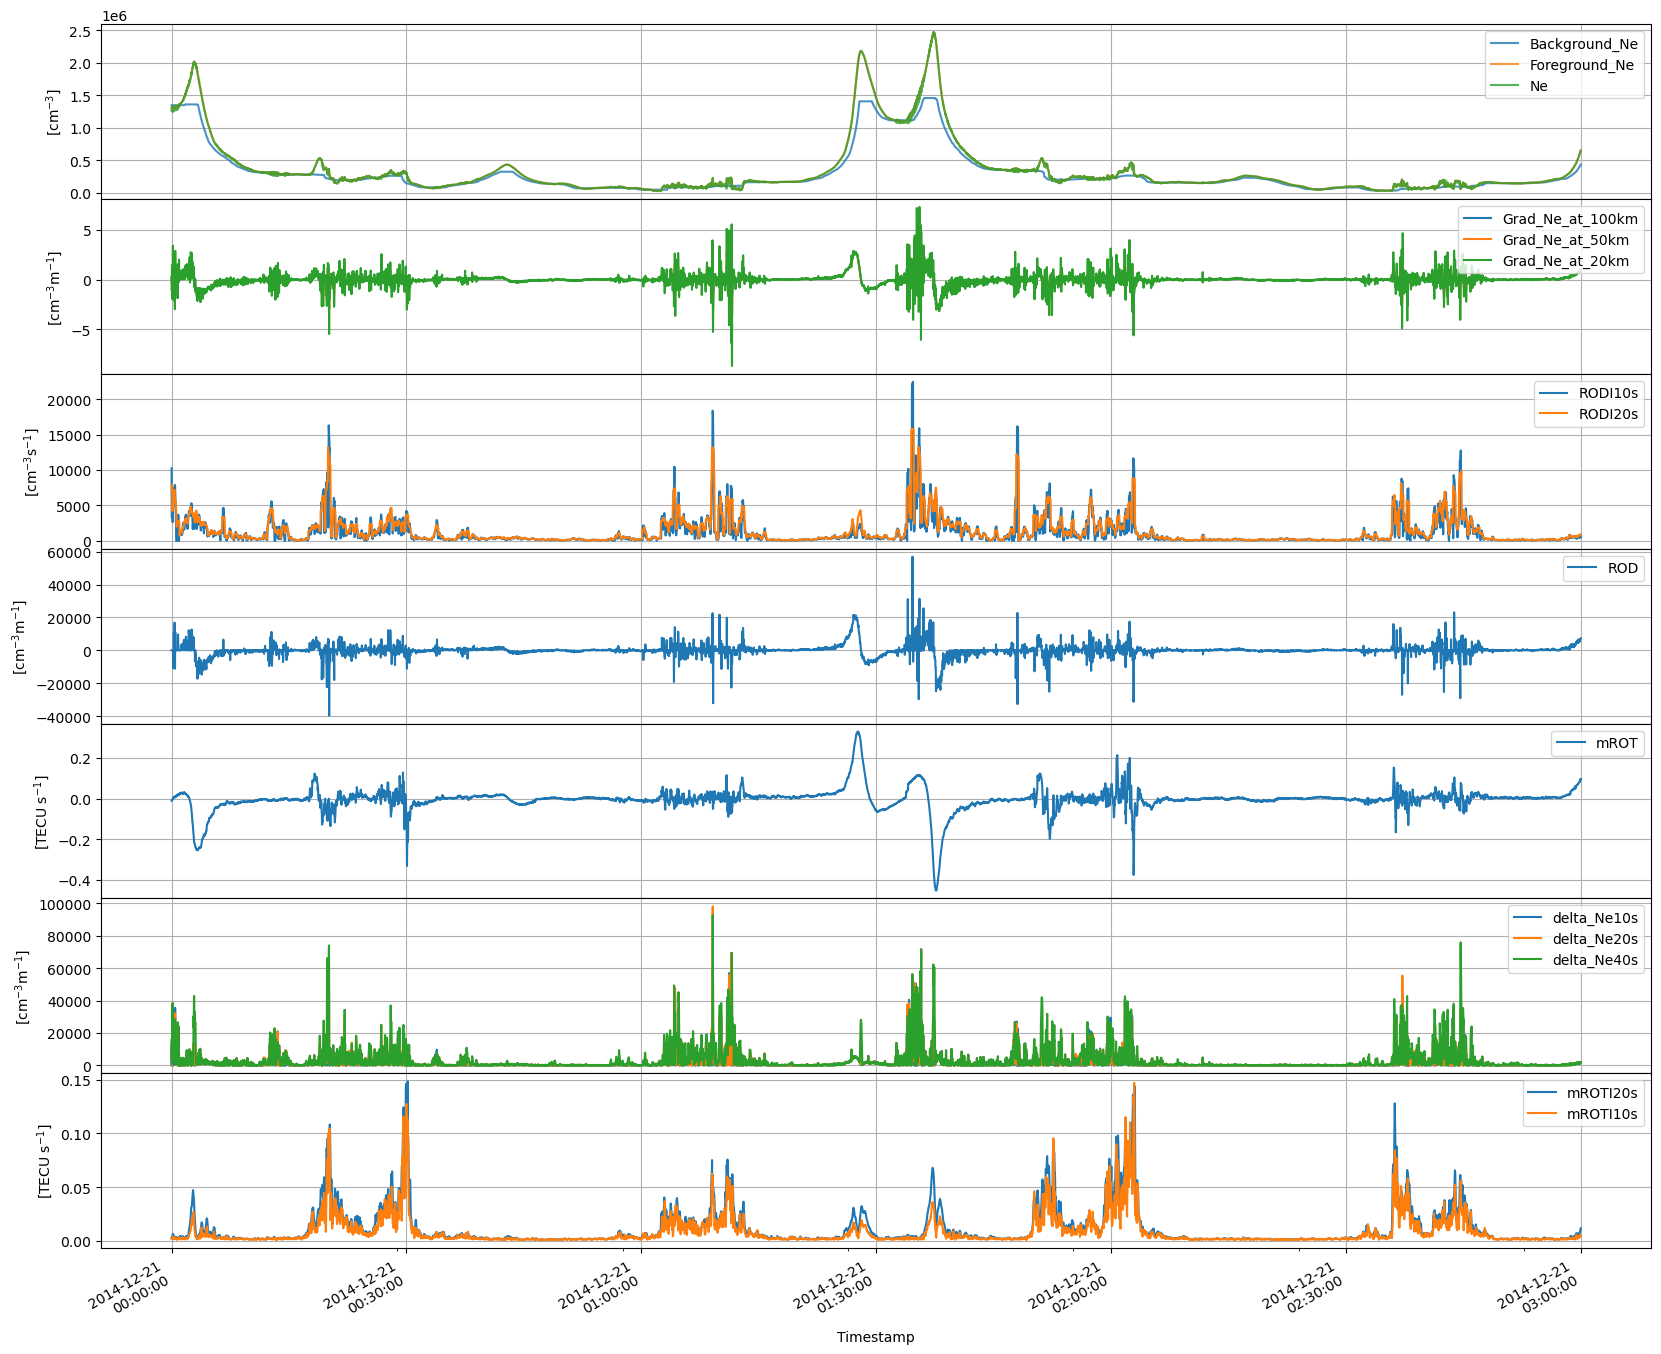

In [8]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
df.plot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'], alpha=0.8)
df.plot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
df.plot(ax=axes[2], y=['RODI10s', 'RODI20s'])
df.plot(ax=axes[3], y=['ROD'])
df.plot(ax=axes[4], y=['mROT'])
df.plot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
df.plot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
axes[0].set_ylabel("[cm$^{-3}$]")
axes[1].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[2].set_ylabel("[cm$^{-3}$s$^{-1}$]")
axes[3].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[4].set_ylabel("[TECU s$^{-1}$]")
axes[5].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[6].set_ylabel("[TECU s$^{-1}$]")
axes[6].set_xlabel("Timestamp")

for ax in axes:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
fig.subplots_adjust(hspace=0)

### Load as xarray

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:                 (Timestamp: 10800)
Coordinates:
  * Timestamp               (Timestamp) datetime64[ns] 2014-12-21T00:00:00.19...
Data variables: (12/29)
    Spacecraft              (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A'
    Grad_Ne_at_100km        (Timestamp) float64 -0.08492 -0.144 ... 0.9621
    mVTEC                   (Timestamp) float64 51.79 51.77 ... 20.84 20.94
    IPIR_index              (Timestamp) int32 7 6 6 6 6 6 6 6 ... 4 4 4 4 4 4 4
    mROT                    (Timestamp) float64 -0.01101 -0.01101 ... 0.09621
    IBI_flag                (Timestamp) int32 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1
    ...                      ...
    Ne                      (Timestamp) float64 1.255e+06 1.25e+06 ... 6.468e+05
    TEC_STD                 (Timestamp) float64 3.131 3.122 ... 2.866 2.891
    delta_Ne10s             (Timestamp) float64 67.88 1.296e+04 ... 1.702e+03
    RODI10s                 (Timestamp) float64 1.024e+04 3.263e+03 ... 503.7
    Grad_Ne_at_50km         (Timestamp) float64 -0.4039 0.1449 ... 0.9347 0.9775
    Ne_quality_flag         (Timestamp) int32 20000 20000 20000 ... 10000 10000
Attributes:
    Sources:         ['SW_OPER_IPDAIRR_2F_20141221T000000_20141221T235959_0302']
    MagneticModels:  []
    AppliedFilters:  []

### Alternative plot setup

To plot the data from xarray, we need a different plotting setup. This does however give us more control over the plot. The units are extracted directly from the xarray object.

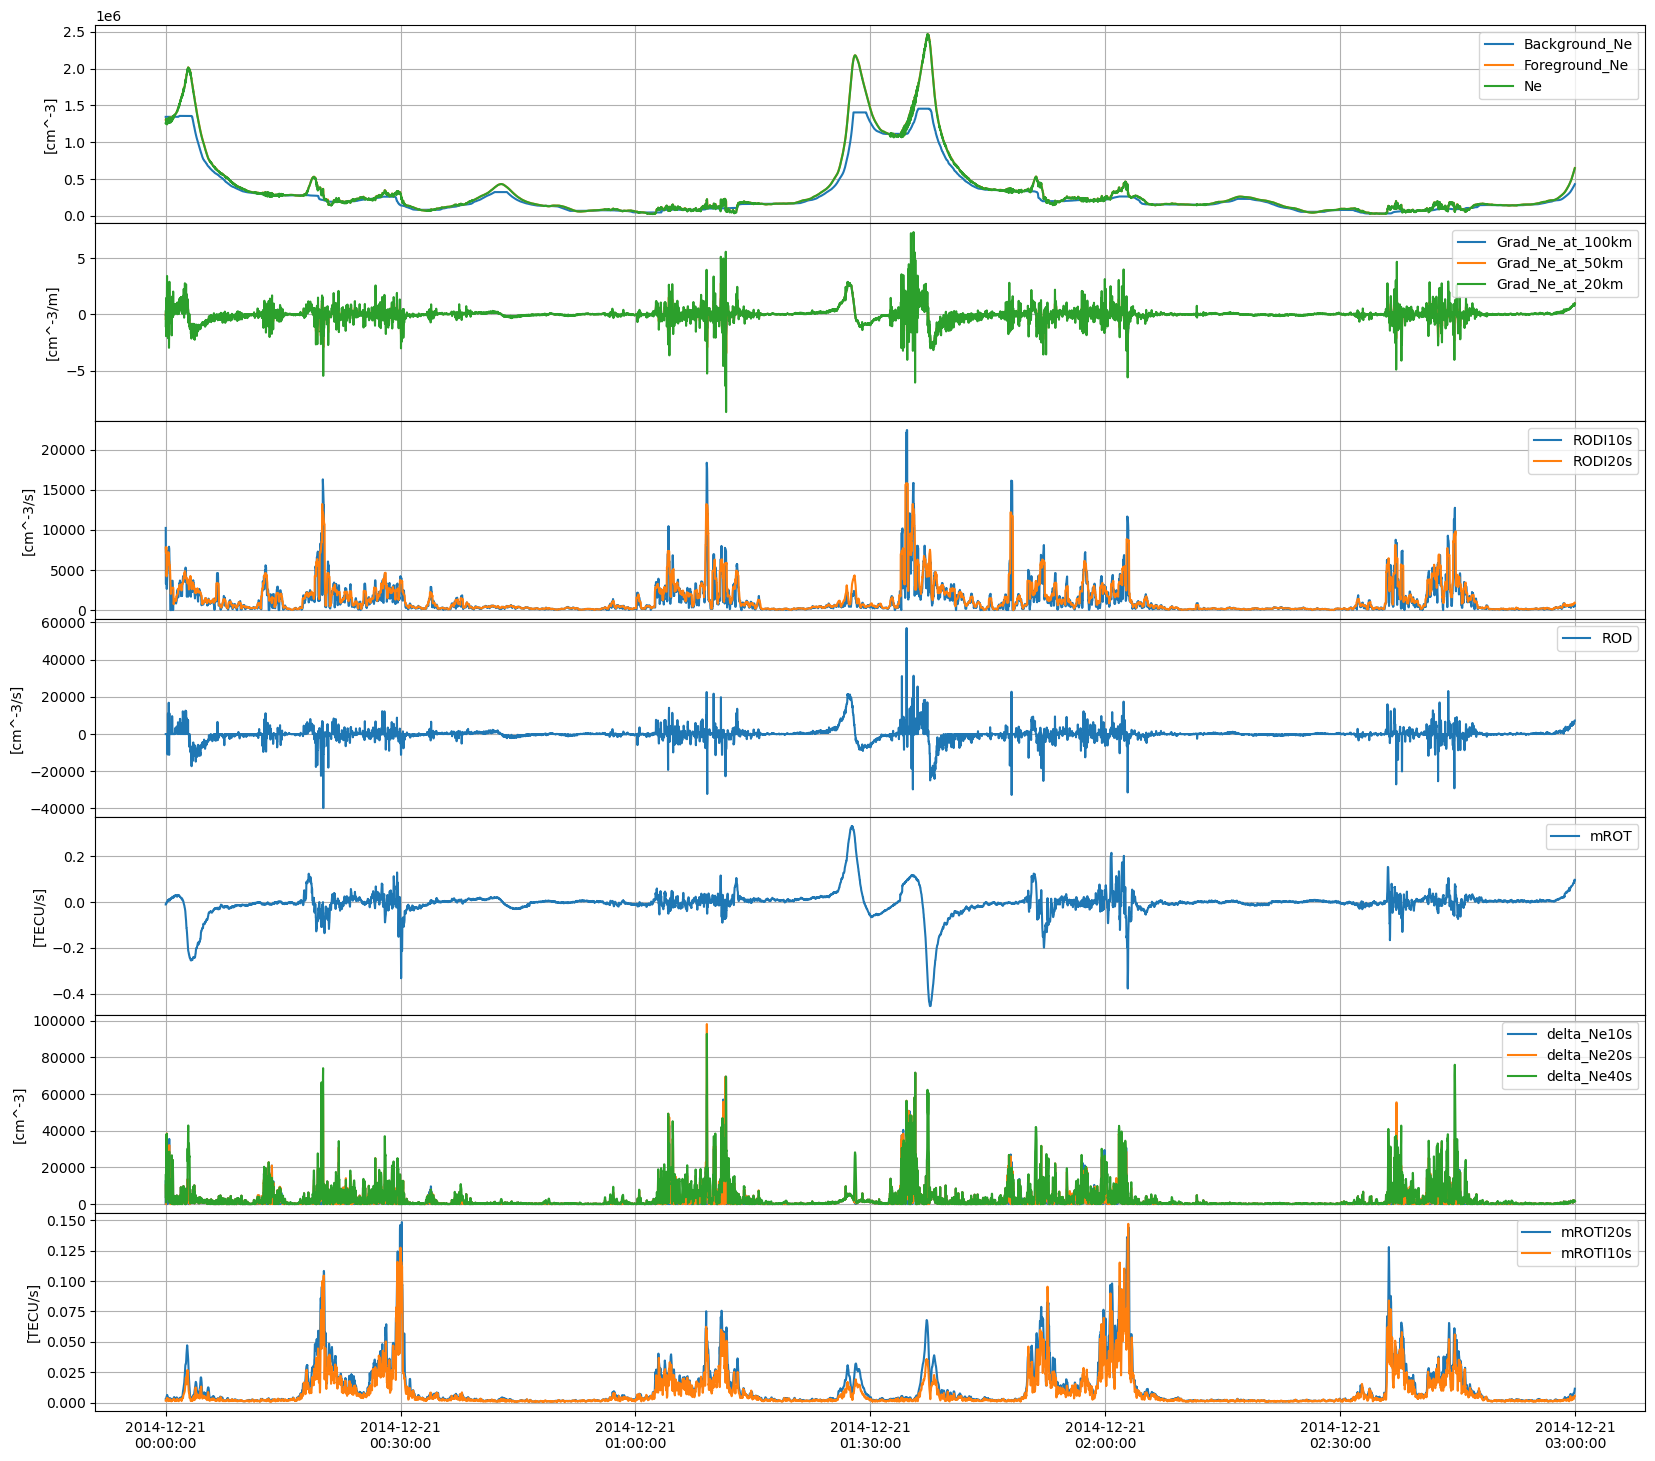

In [10]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
def subplot(ax=None, y=None, **kwargs):
    """Plot combination of variables onto a given axis"""
    units = ds[y[0]].units
    for var in y:
        ax.plot(ds["Timestamp"], ds[var], label=var, **kwargs)
        if units != ds[var].units:
            raise ValueError(f"Units mismatch for {var}")
    ax.set_ylabel(f"[{units}]")
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
subplot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'])
subplot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
subplot(ax=axes[2], y=['RODI10s', 'RODI20s'])
subplot(ax=axes[3], y=['ROD'])
subplot(ax=axes[4], y=['mROT'])
subplot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
subplot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
fig.subplots_adjust(hspace=0)